In [88]:
#initialisation des variables et chargement des fichiers
import requests
import json
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

path_fichier_resultats_elections = 'DATASET - COMMUNES (v.elecPW2024-2019).json'
path_fichier_indicateurs_IWEPS = 'Catalogue_indicateurs_IWEPS.xlsx'

with open(path_fichier_resultats_elections, "r", encoding="utf-8") as file:
    dict_resultats_elections = json.load(file)

with open(path_fichier_indicateurs_IWEPS, "rb") as file:
    df_catalogue_indicateurs_IWEPS = pd.read_excel(file)


THE_json = {
    'Commune': [],

}
THE_df = {}






In [89]:
#boucles pour les indicateurs IWEPS
for indicateur in df_catalogue_indicateurs_IWEPS['Indicateurs']:
    id_indicateur = df_catalogue_indicateurs_IWEPS.loc[df_catalogue_indicateurs_IWEPS['Indicateurs'] == indicateur, 'ID'].values[0]
    nom_indicateur = df_catalogue_indicateurs_IWEPS.loc[df_catalogue_indicateurs_IWEPS['Indicateurs'] == indicateur, 'Indicateurs'].values[0]
    URL = f"https://opendata.iweps.be/api/data/json/{id_indicateur}/com+period=last"
    response = requests.get(URL)

    
    dict_indicateurs_IWEPS_temp = response.json()
    df_indicateurs_IWEPS_temp = pd.DataFrame(dict_indicateurs_IWEPS_temp)

    if not THE_json['Commune']:
        THE_json['Commune'] = list(df_indicateurs_IWEPS_temp['entite'])

    THE_json[nom_indicateur] = []
    mapping = dict(zip(df_indicateurs_IWEPS_temp['entite'], df_indicateurs_IWEPS_temp['valeur']))

    for commune in THE_json['Commune']:
        valeur = mapping.get(commune, np.nan)
        try:
            THE_json[nom_indicateur].append(float(str(valeur).replace(',', '.')))
        except:
            THE_json[nom_indicateur].append(np.nan)






In [90]:
for key in THE_json.keys():
    print(key, ' ',len(THE_json[key]))

Commune   263
Âge moyen   263
Part de femmes   263
Part d’hommes   263
%0-17 ans   263
%18-24 ans   263
%25-64 ans   263
%65+   263
%non belges   263
Taille ménage moyen   263
Densité population   263
Prix moyen du terrain à bâtir   263
Revenu moyen par habitant   263
Revenu net médian par déclaration   263
Taux moyen de RI/ERI 18-64 ans   263
Part de compteurs à budget électricité   263
Nombre crédits en cours/population majeure   263
Nombre crédits hypothécaires/population majeure   263
Part des postes salariés dans l'industrie   263
Part des postes salariés dans l'agriculture   263
Part des postes salariés dans la construction   263
Part des postes salariés dans le commerce   263
Part des postes salariés dans l'information et la communication   263
Part des postes salariés dans la finance et l'assurance   263
Part des postes salariés dans l'immobilier   263
Part des postes salariés dans les services spécialisés   263
Part des postes salariés dans l'administration, l'enseignement, la

In [91]:
dict_resultats_elections

{'Arlon': {'élections PW 2024': {'MR': '31,67%',
   'PS': '19,77%',
   'LES ENGAGÉS': '28,84%',
   'CDH': '-',
   'DéFI': '3,38%',
   'ECOLO': '11,84%',
   'Collectif Citoyen': '4,49%',
   'PARTI POPULAIRE': '-',
   'PTB': '-',
   'LISTES DESTEXHE': '-',
   'NATION': '-'},
  'élections PW 2019': {'MR': '22,95%',
   'PS': '15,20%',
   'LES ENGAGÉS': '-',
   'CDH': '21,32%',
   'DéFI': '3,59%',
   'ECOLO': '23,63%',
   'Collectif Citoyen': '1,35%',
   'PARTI POPULAIRE': '3,43%',
   'PTB': '6,81%',
   'LISTES DESTEXHE': '0,89%',
   'NATION': '0,84%'},
  'élections CHAMBRE 2024': {'MR': '28,94%',
   'PS': '15,75%',
   'LES ENGAGÉS': '30,21%',
   'CDH': '-',
   'N-VA': '2,69%',
   'DéFI': '3,03%',
   'ECOLO': '11,65%',
   'BLANCO': '2,06%',
   'Collectif Citoyen': '2,55%',
   'CHEZ NOUS': '3,12%',
   'PARTI POPULAIRE': '-',
   'VLAAMS BELANG': '-',
   'PTB': '-',
   'LISTES DESTEXHE': '-',
   'LA DROITE': '-',
   'NATION': '-'},
  'élections CHAMBRE 2019': {'MR': '21,59%',
   'PS': '14,30%'

In [92]:
#boucle pour les résultats des élections

partis_map = {
    'PW24 MR': 'MR',
    'PW24 PS': 'PS',
    'PW24 LE': 'LES ENGAGÉS',
    'PW24 PTB': 'PTB',
    'PW24 ECOLO': 'ECOLO'
}

for cle in ['PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO']:
    if cle not in THE_json:
        THE_json[cle] = []

for commune in THE_json['Commune']:
    commune_data = dict_resultats_elections.get(commune, None)
    
    if not commune_data or 'élections PW 2024' not in commune_data:
        # Remplir NaN si la commune ou la section n'existe pas
        for cle in partis_map.keys():
            THE_json[cle].append(np.nan)
        continue

    resultats = commune_data['élections PW 2024']
    
    for cle_json, nom_parti in partis_map.items():
        val = resultats.get(nom_parti, None)
        if val is None or val == '-' or val == '':
            THE_json[cle_json].append(np.nan)
        else:
            try:
                THE_json[cle_json].append(float(val.replace(',', '.').replace('%', '')))
            except:
                THE_json[cle_json].append(np.nan)

In [199]:
for col in ['PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO']:
    if col in THE_json:
        del THE_json[col]

In [200]:

partis_map = {
    'PW19 MR': 'MR',
    'PW19 PS': 'PS',
    'PW19 LE': 'CDH',
    'PW19 PTB': 'PTB',
    'PW19 ECOLO': 'ECOLO'

}

for cle in ['PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO']:
    if cle not in THE_json:
        THE_json[cle] = []

for commune in THE_json['Commune']:
    commune_data = dict_resultats_elections.get(commune, None)
    
    if not commune_data or 'élections PW 2019' not in commune_data:
        # Remplir NaN si la commune ou la section n'existe pas
        for cle in partis_map.keys():
            THE_json[cle].append(np.nan)
        continue

    resultats = commune_data['élections PW 2019']
    
    for cle_json, nom_parti in partis_map.items():
        val = resultats.get(nom_parti, None)
        if val is None or val == '-' or val == '':
            THE_json[cle_json].append(np.nan)
        else:
            try:
                THE_json[cle_json].append(float(val.replace(',', '.').replace('%', '')))
            except:
                THE_json[cle_json].append(np.nan)

In [ ]:

partis_map = {
    'CH24 MR': 'MR',
    'CH24 PS': 'PS',
    'CH24 LE': 'LES ENGAGÉS',
    'CH24 PTB': 'PTB',
    'CH24 ECOLO': 'ECOLO'

}

for cle in ['CH24 PS', 'CH24 MR', 'CH24 LE', 'CH24 PTB', 'CH24 ECOLO']:
    if cle not in THE_json:
        THE_json[cle] = []

for commune in THE_json['Commune']:
    commune_data = dict_resultats_elections.get(commune, None)
    
    if not commune_data or 'élections CHAMBRE 2024' not in commune_data:
        # Remplir NaN si la commune ou la section n'existe pas
        for cle in partis_map.keys():
            THE_json[cle].append(np.nan)
        continue

    resultats = commune_data['élections CHAMBRE 2024']
    
    for cle_json, nom_parti in partis_map.items():
        val = resultats.get(nom_parti, None)
        if val is None or val == '-' or val == '':
            THE_json[cle_json].append(np.nan)
        else:
            try:
                THE_json[cle_json].append(float(val.replace(',', '.').replace('%', '')))
            except:
                THE_json[cle_json].append(np.nan)

In [201]:
THE_df = pd.DataFrame(THE_json)
THE_df.sort_values(by='Commune')

Commune  Âge moyen  Part de femmes  Part d’hommes  \
48               Aiseau-Presles       41.9       51.430000      48.570000   
96                         Amay       41.5       50.930000      49.070000   
137                     Amblève       42.8       49.290000      50.710000   
240                     Andenne       41.5       51.230000      48.770000   
69                    Anderlues       41.4       50.750000      49.250000   
225                       Anhée       42.8       50.690000      49.310000   
113                         Ans       42.3       51.930000      48.070000   
110                   Anthisnes       43.2       50.710000      49.290000   
80                      Antoing       42.3       50.870000      49.130000   
180                       Arlon       40.4       50.180000      49.820000   
241                     Assesse       40.3       50.250000      49.750000   
27                          Ath       43.5       51.580000      48.420000   
181                      Attert       39.7       49.920000      50.080000   
182                     Aubange       40.2       50.340000      49.660000   
138                       Aubel       44.6       50.490000      49.510000   
114                       Awans       44.3       51.340000      48.660000   
115                    Aywaille       42.8       50.650000      49.350000   
139                      Baelen       42.4       49.480000      50.520000   
116                    Bassenge       42.4       50.630000      49.370000   
193                    Bastogne       39.5       50.236852      49.763148   
185       Bastogne [avant 2025]       39.9       50.410000      49.590000   
70                     Beaumont       43.2       50.530000      49.470000   
226                   Beauraing       42.7       51.370000      48.630000   
0                   Beauvechain       42.7       50.770000      49.230000   
28                       Belœil       41.7       50.710000      49.290000   
166                      Berloz       40.1       49.400000      50.600000   
29                   Bernissart       42.1       51.040000      48.960000   
186       Bertogne [avant 2025]       37.7       49.460000      50.540000   
203                     Bertrix       41.7       50.670000      49.330000   
117                Beyne-Heusay       41.9       51.770000      48.230000   
93                       Binche       43.1       52.090000      47.910000   
227                      Bièvre       42.7       50.460000      49.540000   
133                      Blegny       43.7       51.110000      48.890000   
204                    Bouillon       45.9       50.070000      49.930000   
50                       Boussu       41.6       52.390000      47.610000   
63              Braine-Le-Comte       41.6       51.020000      48.980000   
1               Braine-l'Alleud       43.4       51.960000      48.040000   
2             Braine-le-Château       42.6       51.040000      48.960000   
167                     Braives       41.3       50.230000      49.770000   
30                   Brugelette       39.8       50.530000      49.470000   
87                    Brunehaut       41.9       50.270000      49.730000   
140                    Bullange       44.1       48.110000      51.890000   
97                     Burdinne       40.3       49.830000      50.170000   
163                Burg-Reuland       42.9       49.130000      50.870000   
141                  Butgenbach       44.2       49.980000      50.020000   
81                       Celles       42.8       50.190000      49.810000   
256                 Cerfontaine       42.3       49.790000      50.210000   
38      Chapelle-lez-Herlaimont       42.5       51.730000      48.270000   
39                    Charleroi       40.4       50.950000      49.050000   
19                      Chastre       41.2       51.200000      48.800000   
118               Chaudfontaine       46.4       52.060000      47.940000   
3              Chaum

In [202]:
THE_df[THE_df['Commune'] == 'Liège']

Commune  Âge moyen  Part de femmes  Part d’hommes  %0-17 ans  %18-24 ans  \
125   Liège       40.8           50.38          49.62      19.16        8.97   

     %25-64 ans     %65+  %non belges  Taille ménage moyen  \
125       53.87  35247.0        20.38                 1.95   

     Densité population  Prix moyen du terrain à bâtir  \
125              2851.8                          81.69   

     Revenu moyen par habitant  Revenu net médian par déclaration  \
125                    17730.0                            22738.0   

     Taux moyen de RI/ERI 18-64 ans  Part de compteurs à budget électricité  \
125                        9.907334                                5.427729   

     Nombre crédits en cours/population majeure  \
125                                         NaN   

     Nombre crédits hypothécaires/population majeure  \
125                                              NaN   

     Part des postes salariés dans l'industrie  \
125                                        5.9   

     Part des postes salariés dans l'agriculture  \
125                                          0.0   

     Part des postes salariés dans la construction  \
125                                            1.9   

     Part des postes salariés dans le commerce  \
125                                       16.4   

     Part des postes salariés dans l'information et la communication  \
125                                                2.2                 

     Part des postes salariés dans la finance et l'assurance  \
125                                                3.2         

     Part des postes salariés dans l'immobilier  \
125                                         0.6   

     Part des postes salariés dans les services spécialisés  \
125                                               14.0        

     Part des postes salariés dans l'administration, l'enseignement, la santé, le social, la défense  \
125                                               50.8                                                 

     Part des postes de travail à niveau de connaissance élevé  \
125                                               76.6           

     Part des postes de travails dans l'industrie à haute technologie  \
125                                                6.3                  

     Part des indépendants professions libérales  \
125                                         44.7   

     Part des indépendants agriculture  Part des indépendants industrie  \
125                                1.8                             17.2   

     Part des indépendants commerces et services  Taux de chomage   \
125                                         35.6              25.0   

     Part de temps partiels dans l'emploi salarié  \
125                                          32.2   

     Part des travailleurs intérimaires dans l'emploi salarié  \
125                                                4.4          

     Lits MR/MRS par 1000 personnes de 60+  Prix médian des appartements  \
125                                   57.9                      125000.0   

     Prix médian des maisons  Prix médian tous logements confondus  \
125                 140000.0                              170000.0   

     Part de buildings et immeubles à appartement  \
125                                          37.0   

     Part des ménages vivant dans un logement public  \
125                                             8.03   

     Indice de qualité de l'air  Quantité d'ordures collectées par habitant  \
125                         5.7                                       161.7   

     Millions de véhicules.km toutes voiries  Nombre de km de RAVEL  \
125                                   1409.6                  28.15   

     Nombre d'inscrits dans le maternel  Nombre d'inscrits dans le primaire  \
125                              7323.0                             14575.0   

     Nombre d'inscrits dans le secondaire  \
125                    

In [203]:
THE_df[pd.isna(THE_df['PW24 PS'])]

Commune  Âge moyen  Part de femmes  Part d’hommes  %0-17 ans  \
193  Bastogne       39.5       50.236852      49.763148  21.969258   

     %18-24 ans  %25-64 ans    %65+  %non belges  Taille ménage moyen  \
193    9.034223    52.96307  3317.0     8.352668             2.336791   

     Densité population  Prix moyen du terrain à bâtir  \
193           78.160756                            NaN   

     Revenu moyen par habitant  Revenu net médian par déclaration  \
193               20265.586842                          28479.795   

     Taux moyen de RI/ERI 18-64 ans  Part de compteurs à budget électricité  \
193                        1.726249                                2.281865   

     Nombre crédits en cours/population majeure  \
193                                         NaN   

     Nombre crédits hypothécaires/population majeure  \
193                                              NaN   

     Part des postes salariés dans l'industrie  \
193                                        9.1   

     Part des postes salariés dans l'agriculture  \
193                                          0.7   

     Part des postes salariés dans la construction  \
193                                            7.1   

     Part des postes salariés dans le commerce  \
193                                       22.6   

     Part des postes salariés dans l'information et la communication  \
193                                                0.3                 

     Part des postes salariés dans la finance et l'assurance  \
193                                                1.6         

     Part des postes salariés dans l'immobilier  \
193                                         0.5   

     Part des postes salariés dans les services spécialisés  \
193                                               13.4        

     Part des postes salariés dans l'administration, l'enseignement, la santé, le social, la défense  \
193                                               42.4                                                 

     Part des postes de travail à niveau de connaissance élevé  \
193                                          63.651149           

     Part des postes de travails dans l'industrie à haute technologie  \
193                                                0.0                  

     Part des indépendants professions libérales  \
193                                    21.790342   

     Part des indépendants agriculture  Part des indépendants industrie  \
193                           23.43934                        20.789164   

     Part des indépendants commerces et services  Taux de chomage   \
193                                    32.979976              10.6   

     Part de temps partiels dans l'emploi salarié  \
193                                     42.785883   

     Part des travailleurs intérimaires dans l'emploi salarié  \
193                                           2.268826          

     Lits MR/MRS par 1000 personnes de 60+  Prix médian des appartements  \
193                              45.964372                      154000.0   

     Prix médian des maisons  Prix médian tous logements confondus  \
193                 185000.0                                   NaN   

     Part de buildings et immeubles à appartement  \
193                                     19.482261   

     Part des ménages vivant dans un logement public  \
193                                             4.26   

     Indice de qualité de l'air  Quantité d'ordures collectées par habitant  \
193                         4.1                                   87.380628   

     Millions de véhicules.km toutes voiries  Nombre de km de RAVEL  \
193                                    320.7              24.967204   

     Nombre d'inscrits dans le maternel  Nombre d'inscrits dans le primaire  \
193                               874.0                              1917.0   

     Nombre d'inscrits dans le secondaire  \
193                    

In [204]:
colonnes_partis = ['PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO']

THE_df['Premier_parti'] = THE_df[colonnes_partis].idxmax(axis=1)

/var/folders/7h/26ds7dnn0w5b8dv3mmfv9wcr0000gn/T/ipykernel_88883/3448850758.py:3: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  THE_df['Premier_parti'] = THE_df[colonnes_partis].idxmax(axis=1)


In [205]:
THE_df

Commune  Âge moyen  Part de femmes  Part d’hommes  \
0                   Beauvechain       42.7       50.770000      49.230000   
1               Braine-l'Alleud       43.4       51.960000      48.040000   
2             Braine-le-Château       42.6       51.040000      48.960000   
3              Chaumont-Gistoux       43.5       51.070000      48.930000   
4           Court-Saint-Étienne       41.4       51.110000      48.890000   
5                       Genappe       41.4       50.550000      49.450000   
6                  Grez-Doiceau       42.8       51.490000      48.510000   
7                       Incourt       41.2       50.390000      49.610000   
8                         Ittre       43.1       50.950000      49.050000   
9                      Jodoigne       42.1       51.250000      48.750000   
10                     La Hulpe       44.7       51.740000      48.260000   
11           Mont-Saint-Guibert       40.4       50.760000      49.240000   
12                     Nivelles       43.6       52.400000      47.600000   
13                       Perwez       41.6       51.570000      48.430000   
14                    Rixensart       44.1       52.230000      47.770000   
15                       Tubize       40.8       51.330000      48.670000   
16             Villers-la-Ville       41.3       50.500000      49.500000   
17                     Waterloo       44.9       52.600000      47.400000   
18                        Wavre       43.5       51.780000      48.220000   
19                      Chastre       41.2       51.200000      48.800000   
20                     Hélécine       40.2       50.490000      49.510000   
21                        Lasne       44.7       51.370000      48.630000   
22                   Orp-Jauche       41.7       50.760000      49.240000   
23   Ottignies-Louvain-la-Neuve       42.0       51.580000      48.420000   
24                    Ramillies       41.1       50.250000      49.750000   
25                       Rebecq       41.4       51.020000      48.980000   
26                      Walhain       40.0       50.490000      49.510000   
27                          Ath       43.5       51.580000      48.420000   
28                       Belœil       41.7       50.710000      49.290000   
29                   Bernissart       42.1       51.040000      48.960000   
30                   Brugelette       39.8       50.530000      49.470000   
31                     Chièvres       40.9       50.140000      49.860000   
32                   Ellezelles       43.9       50.070000      49.930000   
33                      Flobecq       44.3       50.290000      49.710000   
34          Frasnes-lez-Anvaing       43.1       50.830000      49.170000   
35                      Enghien       42.2       51.530000      48.470000   
36                        Silly       43.9       50.240000      49.760000   
37                     Lessines       42.3       50.740000      49.260000   
38      Chapelle-lez-Herlaimont       42.5       51.730000      48.270000   
39                    Charleroi       40.4       50.950000      49.050000   
40                     Châtelet       41.9       51.870000      48.130000   
41                   Courcelles       41.3       51.490000      48.510000   
42                   Farciennes       39.2       51.460000      48.540000   
43                      Fleurus       42.3       51.640000      48.360000   
44            Fontaine-l'Évêque       41.9       51.660000      48.340000   
45                    Gerpinnes       46.2       51.880000      48.120000   
46          Montigny-le-Tilleul       46.0       53.020000      46.980000   
47                Pont-à-Celles       41.8       51.210000      48.790000   
48               Aiseau-Presles       41.9       51.430000      48.570000   
49             Les Bons Villers       43.6       51.450000      48.550000   
50                       Boussu       41.6       52.390000      47.610000   
51                  

In [206]:
THE_df_sauvegarde = THE_df.copy()

In [99]:
# Votreimport numpy as np
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression

import seaborn as sns

In [207]:
print(X.dtypes)

Âge moyen                                                                                          float64
Part de femmes                                                                                     float64
Part d’hommes                                                                                      float64
%0-17 ans                                                                                          float64
%18-24 ans                                                                                         float64
%25-64 ans                                                                                         float64
%65+                                                                                               float64
%non belges                                                                                        float64
Taille ménage moyen                                                                                float64
Densité population                   

In [129]:


# Éliminer les lignes avec valeurs manquantes
df_clean = THE_df.drop(columns = ['Nombre crédits en cours/population majeure', 'Nombre crédits hypothécaires/population majeure'])
df_clean = df_clean.dropna()
X = df_clean.drop(columns=['Premier_parti', 'Commune', 'PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO'])
y = df_clean['Premier_parti']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mon_arbre_élections = DecisionTreeClassifier(max_depth=6, random_state=42)
Mon_arbre_élections.fit(X_train, y_train)





DecisionTreeClassifier(max_depth=6, random_state=42)

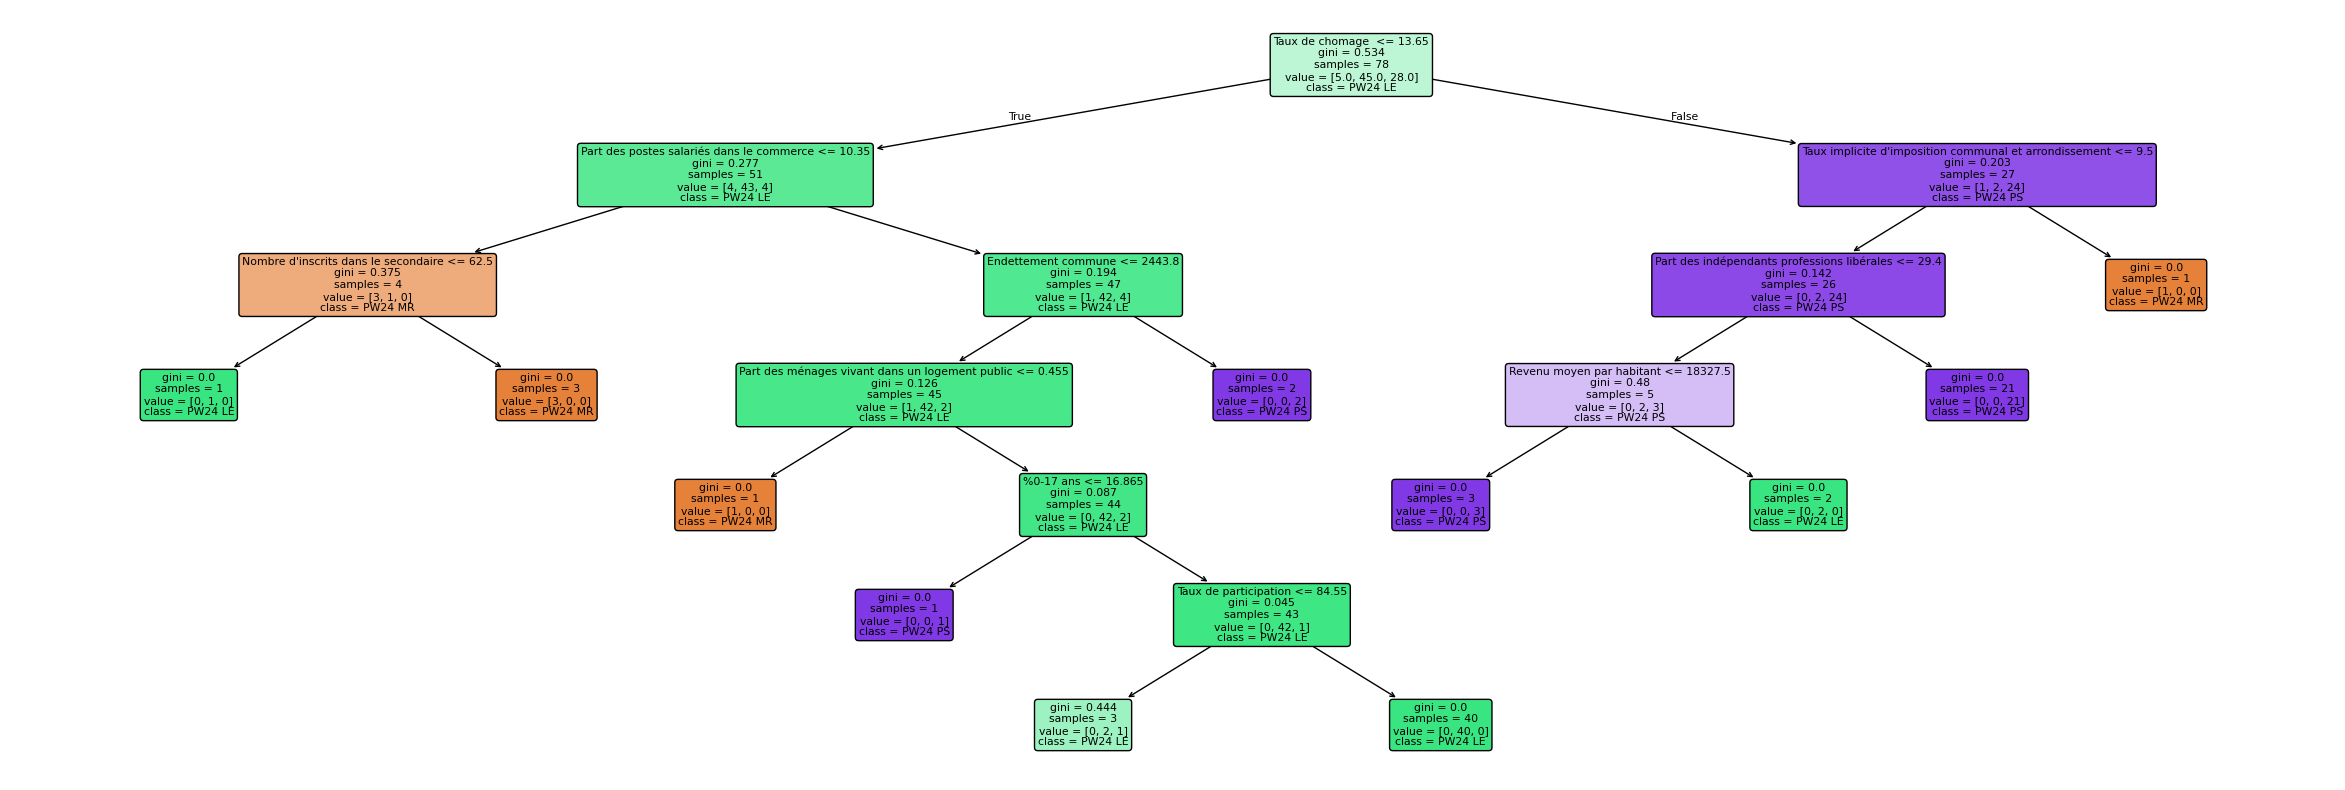

In [130]:
plt.figure(figsize=(30, 10))
plot_tree(Mon_arbre_élections, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()

In [131]:
print(sum(THE_df['Premier_parti'] == 'PW24 PS'))
print(sum(THE_df['Premier_parti'] == 'PW24 PTB'))
print(sum(THE_df['Premier_parti'] == 'PW24 ECOLO'))
print(sum(THE_df['Premier_parti'] == 'PW24 MR'))
print(sum(THE_df['Premier_parti'] == 'PW24 LE'))

53
0
0
171
38


In [134]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = Mon_arbre_élections.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 0.7
              precision    recall  f1-score   support

     PW24 LE       0.00      0.00      0.00         4
     PW24 MR       0.69      0.90      0.78        10
     PW24 PS       0.71      0.83      0.77         6

    accuracy                           0.70        20
   macro avg       0.47      0.58      0.52        20
weighted avg       0.56      0.70      0.62        20



/opt/anaconda3/envs/VinceEnviro/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/VinceEnviro/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/VinceEnviro/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

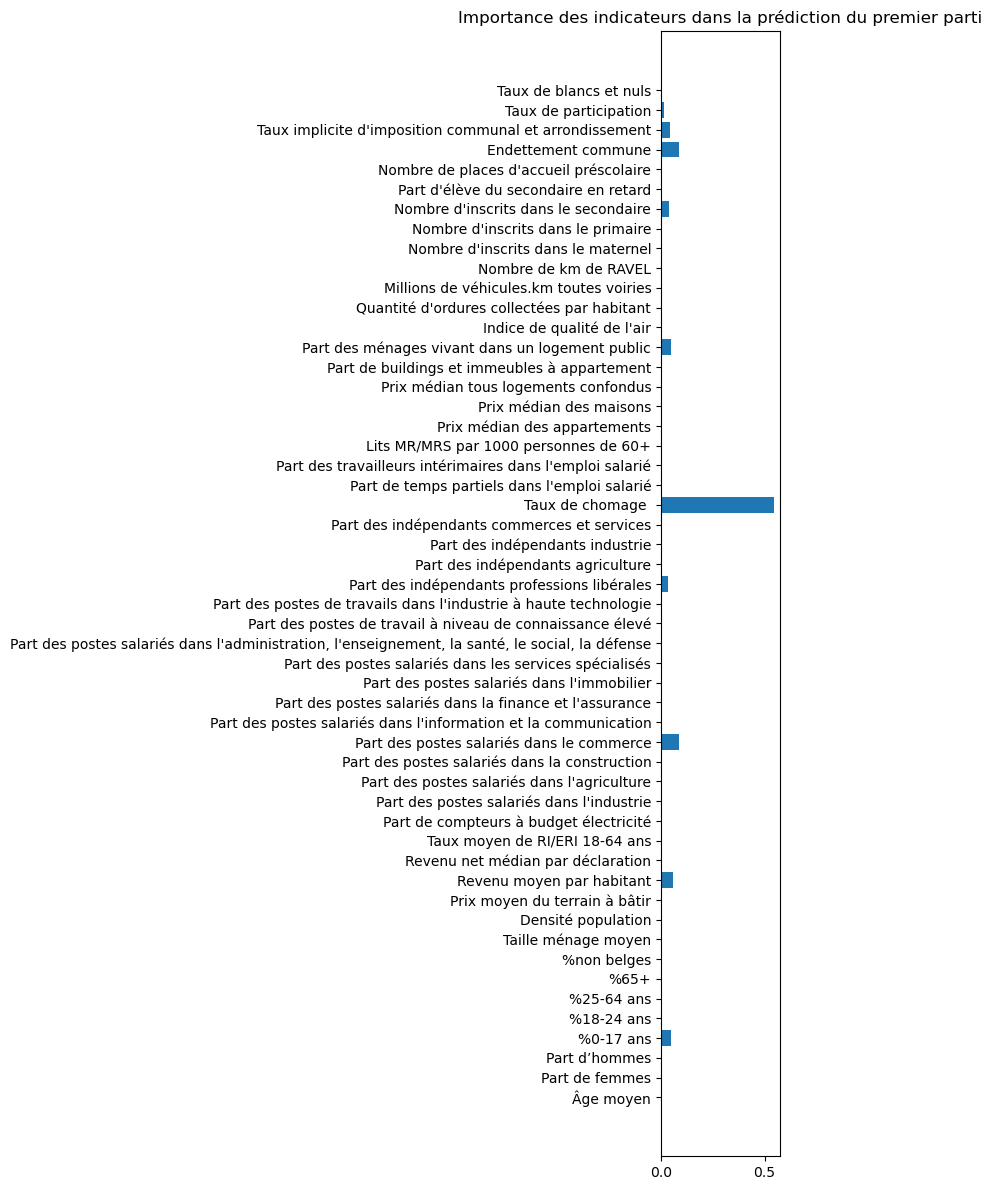

In [133]:
importances = Mon_arbre_élections.feature_importances_
features = X.columns

plt.figure(figsize=(8, 12))
plt.barh(features, importances)
plt.title("Importance des indicateurs dans la prédiction du premier parti")
plt.tight_layout()
plt.show()

In [137]:
y_test == y_pred

123     True
71      True
255    False
39      True
177     True
226    False
127     True
77      True
18      True
1       True
57      True
159    False
88      True
49      True
83     False
11      True
44      True
23     False
247    False
156     True
Name: Premier_parti, dtype: bool

In [144]:
dt = make_pipeline(KNNImputer(),
                   SelectKBest(),
                   StandardScaler(),
                   DecisionTreeClassifier())  # StandardScaler().fit_transform(X_train, y_train) -> DecisionTreeClassifier().fit(X_train, y_train)

params = {'decisiontreeclassifier__max_depth': [2, 3, 4, 5],
          'decisiontreeclassifier__criterion': ['gini', 'entropy'],
          'selectkbest__k': [1, 2, 3, 4, 5]}

grid = GridSearchCV(dt, param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('selectkbest', SelectKBest()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [2, 3, 4, 5],
                         'selectkbest__k': [1, 2, 3, 4, 5]},
             verbose=1)

In [143]:
print(grid.best_params_)
tree = grid.best_estimator_
tree

{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'selectkbest__k': 1}


Pipeline(steps=[('knnimputer', KNNImputer()), ('selectkbest', SelectKBest(k=1)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2))])

In [145]:
# Récupérer l'étape de sélection
selector = tree.named_steps['selectkbest']
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Variables sélectionnées :", list(selected_features))

Variables sélectionnées : ['Taux de chomage ']


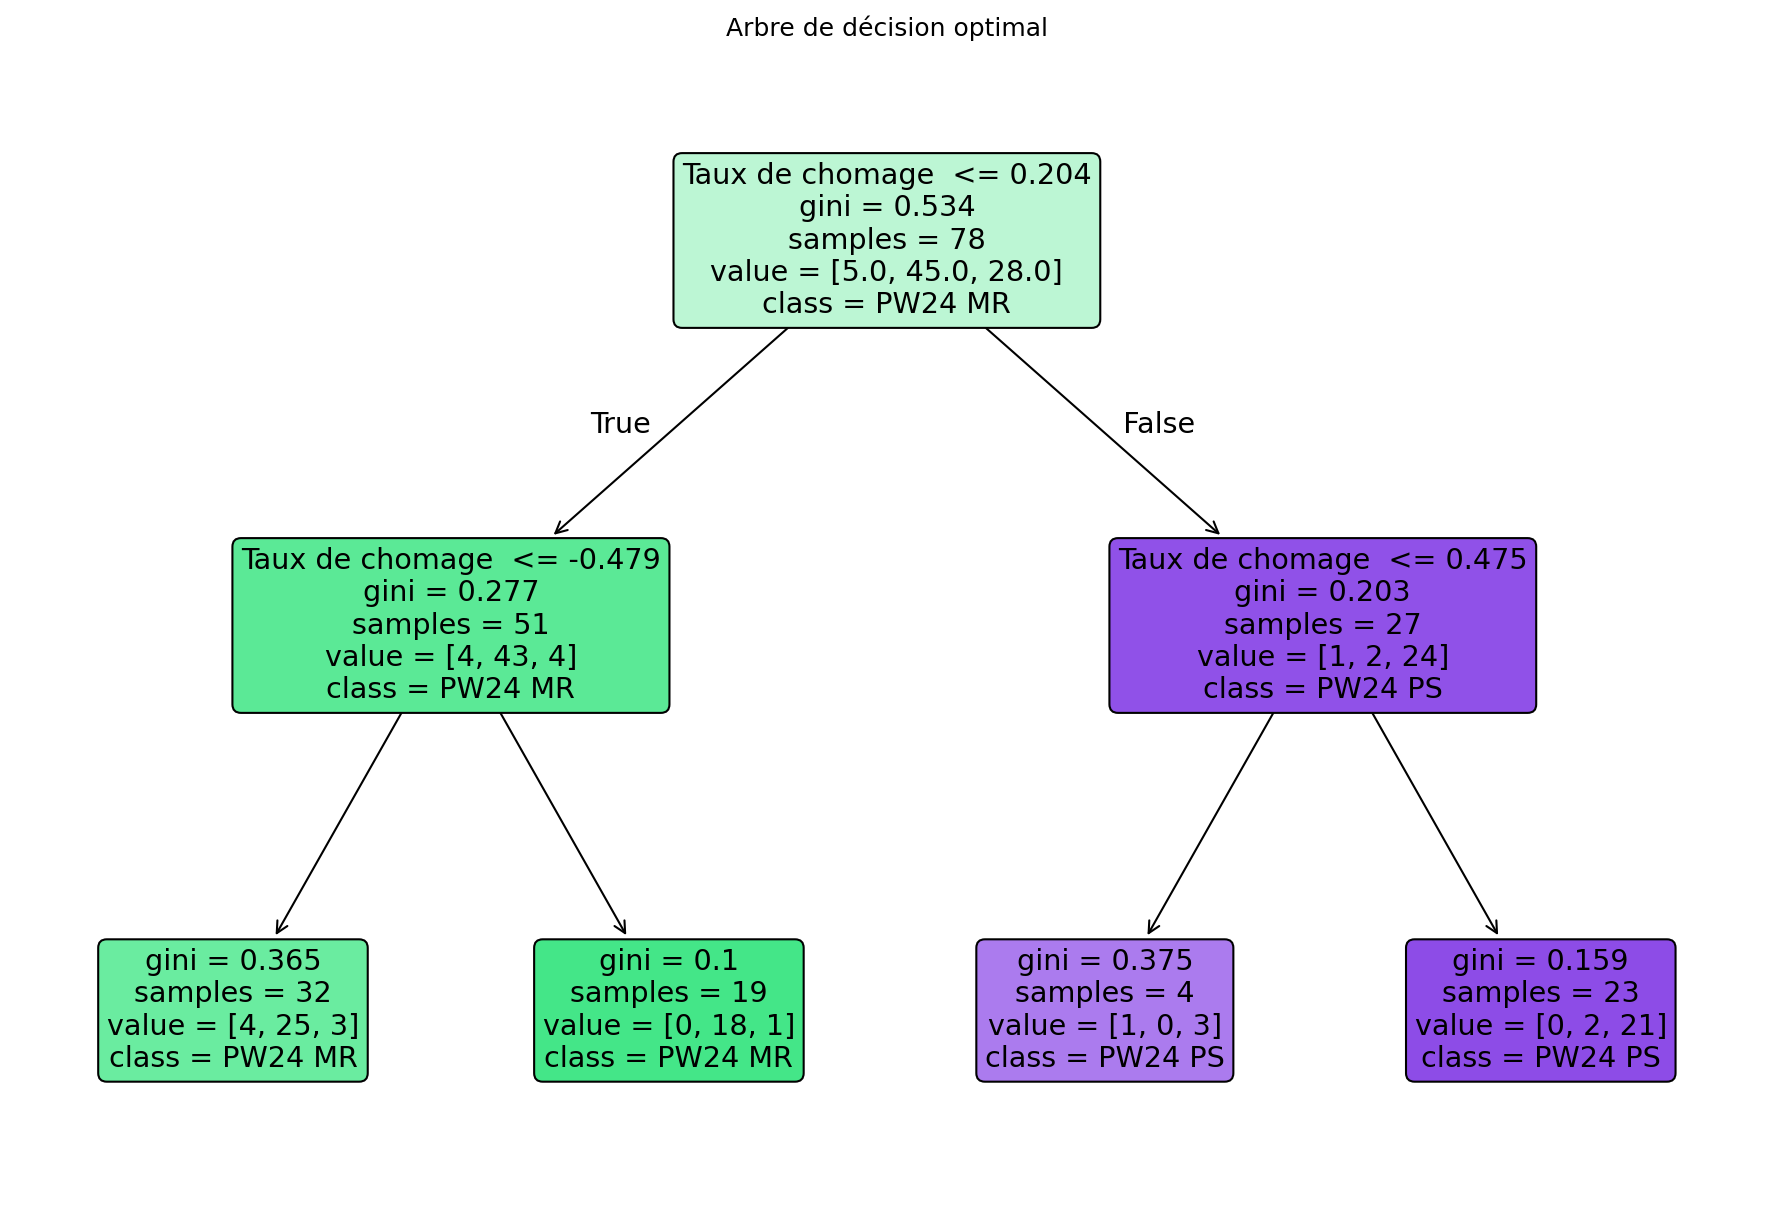

In [146]:


plt.figure(figsize=(15, 10), dpi=150)
plot_tree(tree.named_steps['decisiontreeclassifier'], 
          feature_names=list(X.columns[tree.named_steps['selectkbest'].get_support()]), 
          class_names=tree.named_steps['decisiontreeclassifier'].classes_,
          filled=True, rounded=True)
plt.title("Arbre de décision optimal")
plt.show()


In [209]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor


df_clean = THE_df.drop(columns = ['Nombre crédits en cours/population majeure', 'Nombre crédits hypothécaires/population majeure'])
df_clean = df_clean.dropna()
X = df_clean.drop(columns=['Premier_parti', 'Commune', 'PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO', 'PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO'])
y = df_clean[['PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Importance moyenne par variable
importances = model.estimators_[0].feature_importances_  # pour PS par exemple

# Pour tous les partis
for i, parti in enumerate(y.columns):
    print(f"\n🔹 {parti}")
    imp = pd.Series(model.estimators_[i].feature_importances_, index=X.columns)
    
    print(imp.sort_values(ascending=False).head(10))


🔹 PW24 PS
Part de compteurs à budget électricité         0.258147
Taux de chomage                                0.248502
Part d'élève du secondaire en retard           0.072650
Taux de participation                          0.060973
Part des indépendants commerces et services    0.027781
Revenu net médian par déclaration              0.022689
Prix médian des maisons                        0.020860
%0-17 ans                                      0.018620
Part de femmes                                 0.015282
Prix médian tous logements confondus           0.014171
dtype: float64

🔹 PW24 MR
Part d'élève du secondaire en retard               0.212886
Part des indépendants commerces et services        0.109272
Part de compteurs à budget électricité             0.075240
Taux de chomage                                    0.072933
Part des postes salariés dans la construction      0.056741
Taux de participation                              0.032242
Revenu moyen par habitant                  

In [210]:


# Nettoyage
df_clean = THE_df.drop(columns=[
    'Nombre crédits en cours/population majeure',
    'Nombre crédits hypothécaires/population majeure'
])
df_clean = df_clean.dropna()

X = df_clean.drop(columns=[
    'Premier_parti', 'Commune',
    'PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO',
    'PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO'
])
y = df_clean[['PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# DataFrame global pour toutes les importances + signes
df_all = pd.DataFrame()

for i, parti in enumerate(y.columns):
    rf_imp = pd.Series(model.estimators_[i].feature_importances_, index=X.columns, name='Importance')
    
    signs = []
    for col in X.columns:
        reg = LinearRegression()
        reg.fit(X[[col]], y[parti])  # Pas X_train — on veut globalement la tendance
        coef = reg.coef_[0]
        signe = '+' if coef > 0 else '-' if coef < 0 else '0'
        signs.append(signe)

    rf_imp_signed = pd.Series(signs, index=X.columns, name='Sign')
    
    df_temp = pd.concat([rf_imp, rf_imp_signed], axis=1)
    df_temp['Parti'] = parti
    df_all = pd.concat([df_all, df_temp])

# Réorganisation
df_all = df_all.reset_index().rename(columns={'index': 'Variable'})
df_all['Signed Importance'] = df_all['Sign'] + ' ' + df_all['Importance'].round(3).astype(str)

# Affiche les 10 plus importantes pour chaque parti
for parti in y.columns:
    print(f"\n🔹 {parti}")
    print(df_all[df_all['Parti'] == parti]
          .sort_values('Importance', ascending=False)
          [['Variable', 'Signed Importance']]
          .head(10))


🔹 PW24 PS
                                       Variable Signed Importance
14       Part de compteurs à budget électricité           + 0.258
30                             Taux de chomage            + 0.249
46         Part d'élève du secondaire en retard           + 0.073
50                        Taux de participation           - 0.061
29  Part des indépendants commerces et services           + 0.028
12            Revenu net médian par déclaration           - 0.023
35                      Prix médian des maisons           - 0.021
3                                     %0-17 ans           + 0.019
1                                Part de femmes           + 0.015
36         Prix médian tous logements confondus           - 0.014

🔹 PW24 MR
                                            Variable Signed Importance
98              Part d'élève du secondaire en retard           - 0.213
81       Part des indépendants commerces et services           - 0.109
66            Part de compteurs à budge

In [211]:


# Nettoyage
df_clean = THE_df.drop(columns=[
    'Nombre crédits en cours/population majeure',
    'Nombre crédits hypothécaires/population majeure'
])
df_clean = df_clean.dropna()

X = df_clean.drop(columns=[
    'Premier_parti', 'Commune',
    'PW24 PS', 'PW24 MR', 'PW24 LE', 'PW24 PTB', 'PW24 ECOLO',
    'PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO'
])
y = df_clean[['PW19 PS', 'PW19 MR', 'PW19 LE', 'PW19 PTB', 'PW19 ECOLO']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# DataFrame global pour toutes les importances + signes
df_all = pd.DataFrame()

for i, parti in enumerate(y.columns):
    rf_imp = pd.Series(model.estimators_[i].feature_importances_, index=X.columns, name='Importance')
    
    signs = []
    for col in X.columns:
        reg = LinearRegression()
        reg.fit(X[[col]], y[parti])  # Pas X_train — on veut globalement la tendance
        coef = reg.coef_[0]
        signe = '+' if coef > 0 else '-' if coef < 0 else '0'
        signs.append(signe)

    rf_imp_signed = pd.Series(signs, index=X.columns, name='Sign')
    
    df_temp = pd.concat([rf_imp, rf_imp_signed], axis=1)
    df_temp['Parti'] = parti
    df_all = pd.concat([df_all, df_temp])

# Réorganisation
df_all = df_all.reset_index().rename(columns={'index': 'Variable'})
df_all['Signed Importance'] = df_all['Sign'] + ' ' + df_all['Importance'].round(3).astype(str)

# Affiche les 10 plus importantes pour chaque parti
for parti in y.columns:
    print(f"\n🔹 {parti}")
    print(df_all[df_all['Parti'] == parti]
          .sort_values('Importance', ascending=False)
          [['Variable', 'Signed Importance']]
          .head(10))


🔹 PW19 PS
                                       Variable Signed Importance
14       Part de compteurs à budget électricité           + 0.438
30                             Taux de chomage            + 0.124
29  Part des indépendants commerces et services           + 0.076
46         Part d'élève du secondaire en retard           + 0.049
50                        Taux de participation           - 0.035
35                      Prix médian des maisons           - 0.028
36         Prix médian tous logements confondus           - 0.015
47       Nombre de places d'accueil préscolaire           + 0.013
10                Prix moyen du terrain à bâtir           - 0.012
27            Part des indépendants agriculture           - 0.012

🔹 PW19 MR
                                             Variable Signed Importance
98               Part d'élève du secondaire en retard           - 0.308
66             Part de compteurs à budget électricité           - 0.144
81        Part des indépendants comm

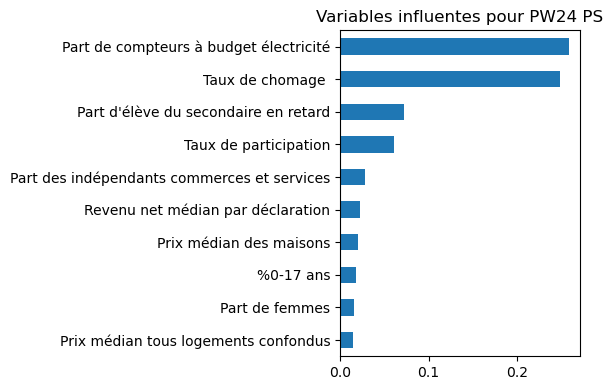

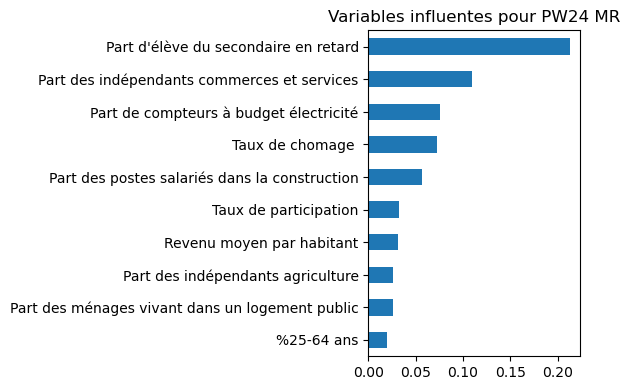

/var/folders/7h/26ds7dnn0w5b8dv3mmfv9wcr0000gn/T/ipykernel_88883/1931280633.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


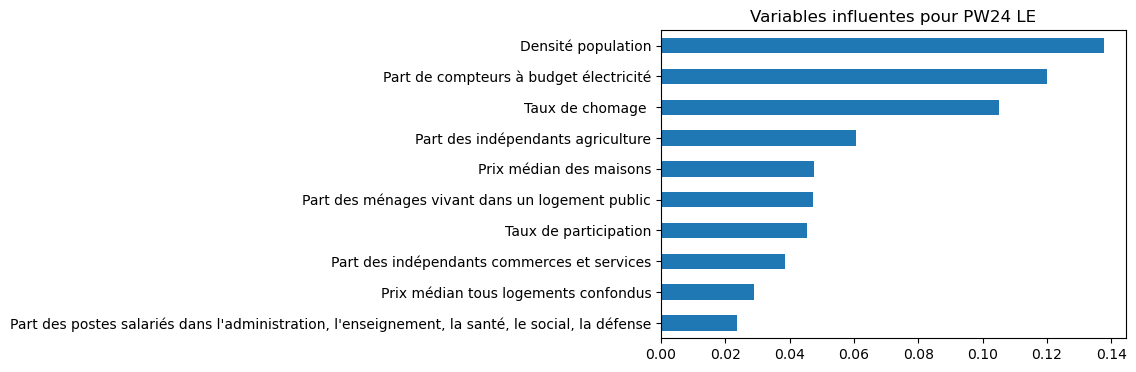

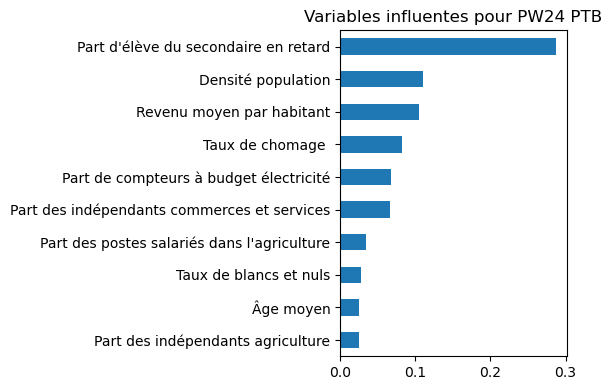

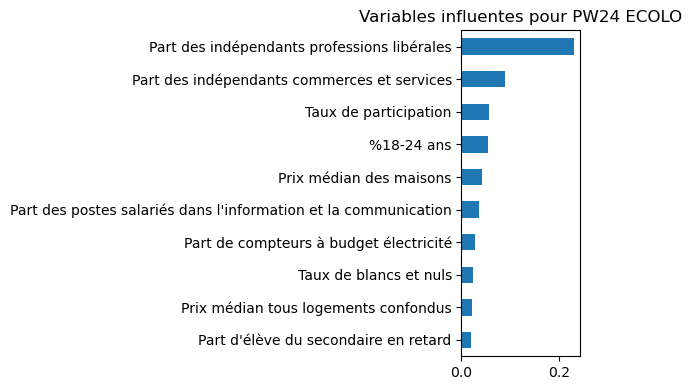

In [189]:
import matplotlib.pyplot as plt

for i, parti in enumerate(y.columns):
    plt.figure(figsize=(6,4))
    pd.Series(model.estimators_[i].feature_importances_, index=X.columns)\
      .sort_values(ascending=True).tail(10).plot(kind='barh')
    plt.title(f"Variables influentes pour {parti}")
    plt.tight_layout()
    plt.show()

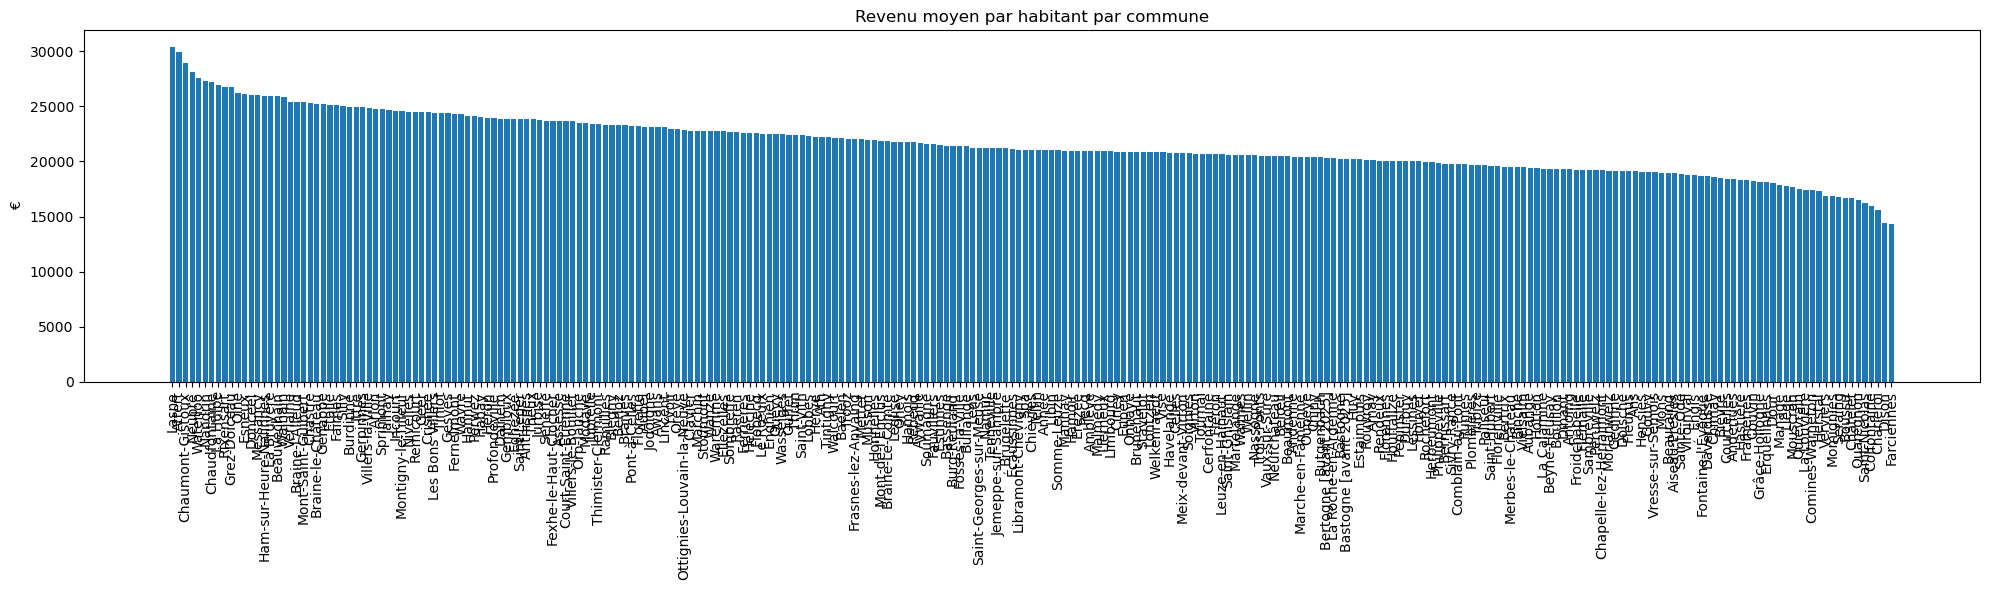

In [162]:
df_sorted = THE_df.sort_values(by='Revenu moyen par habitant', ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(df_sorted['Commune'], df_sorted['Revenu moyen par habitant'])
plt.xticks(rotation=90)
plt.title("Revenu moyen par habitant par commune")
plt.ylabel("€")
plt.tight_layout()
plt.show()

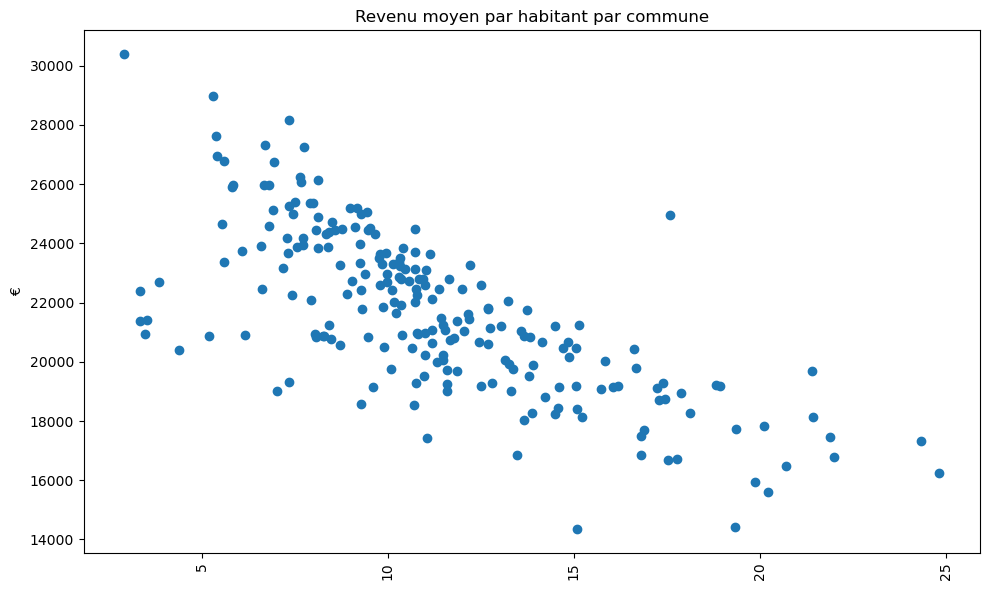

In [172]:
df_sorted = THE_df.sort_values(by='Revenu moyen par habitant', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['PW24 PTB'], df_sorted['Revenu moyen par habitant'])
plt.xticks(rotation=90)
plt.title("Revenu moyen par habitant par commune")
plt.ylabel("€")
plt.tight_layout()
plt.show()

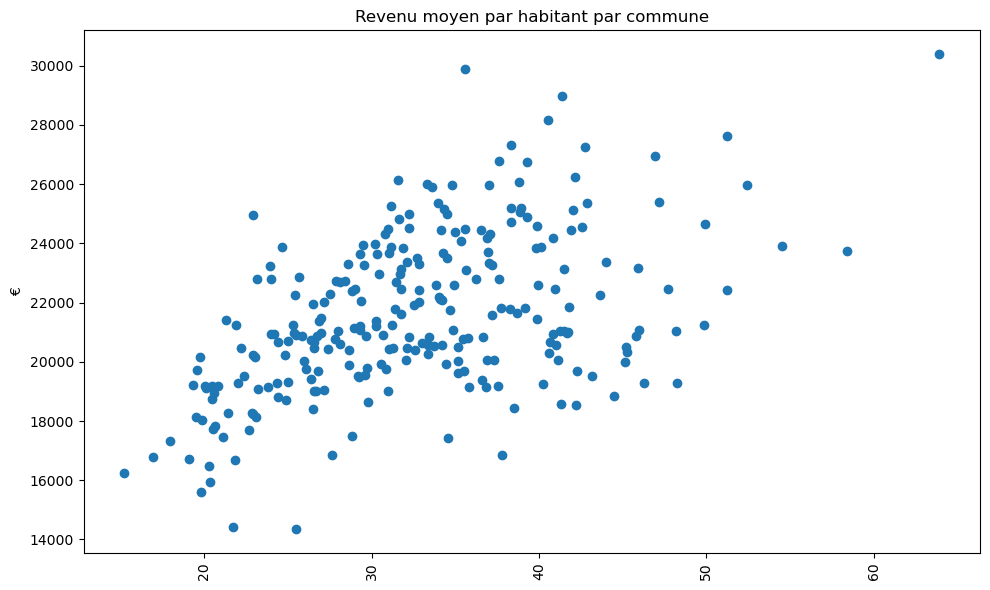

In [173]:
df_sorted = THE_df.sort_values(by='Revenu moyen par habitant', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['PW24 MR'], df_sorted['Revenu moyen par habitant'])
plt.xticks(rotation=90)
plt.title("Revenu moyen par habitant par commune")
plt.ylabel("€")
plt.tight_layout()
plt.show()

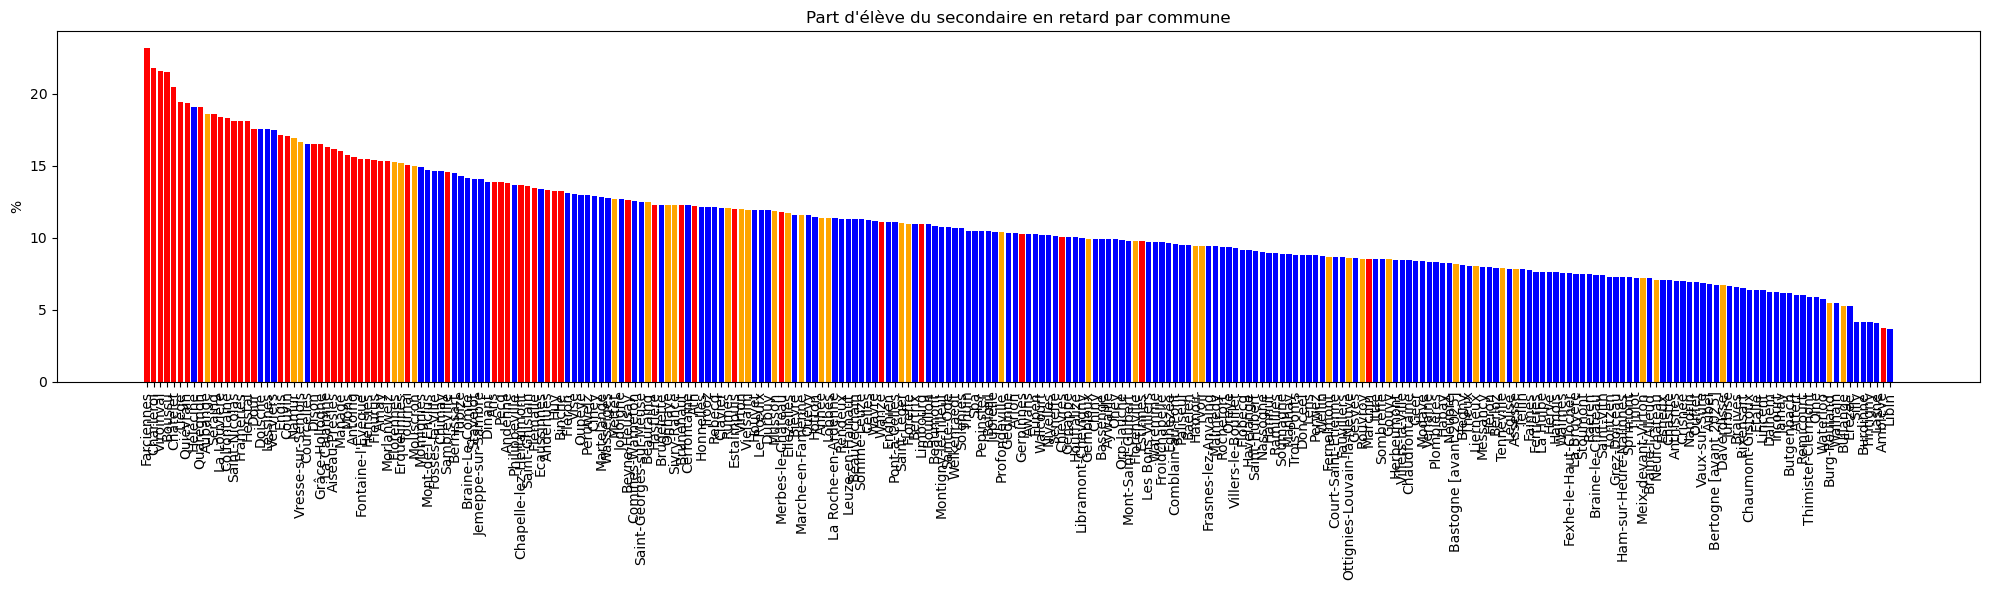

In [180]:
df_sorted = THE_df.sort_values(by="Part d'élève du secondaire en retard", ascending=False)
df_sorted = df_sorted[df_sorted['Premier_parti'].notna()]

couleurs = {
    'PW24 PS': 'red',
    'PW24 MR': 'blue',
    'PW24 LE': 'orange',
    'PW24 PTB': 'purple',
    'PW24 ECOLO': 'green'
}

# Obtenir les couleurs à utiliser pour chaque barre
bar_colors = df_sorted['Premier_parti'].map(couleurs)

plt.figure(figsize=(20, 6))
plt.bar(df_sorted['Commune'], df_sorted['Part d\'élève du secondaire en retard'], color=bar_colors)
plt.xticks(rotation=90)
plt.title("Part d'élève du secondaire en retard par commune")
plt.ylabel("%")
plt.tight_layout()
plt.show()

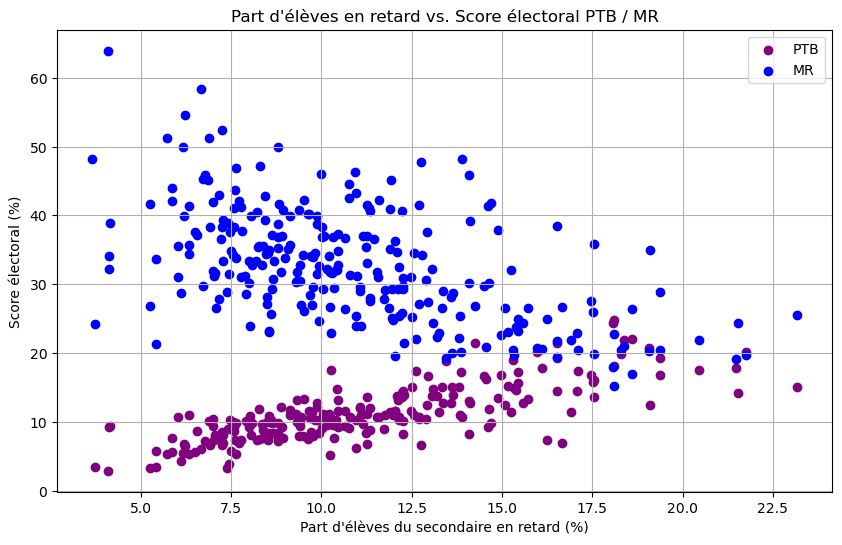

In [181]:
plt.figure(figsize=(10, 6))
plt.scatter(THE_df['Part d\'élève du secondaire en retard'], THE_df['PW24 PTB'], color='purple', label='PTB')
plt.scatter(THE_df['Part d\'élève du secondaire en retard'], THE_df['PW24 MR'], color='blue', label='MR')
plt.xlabel("Part d'élèves du secondaire en retard (%)")
plt.ylabel("Score électoral (%)")
plt.legend()
plt.title("Part d'élèves en retard vs. Score électoral PTB / MR")
plt.grid(True)
plt.show()

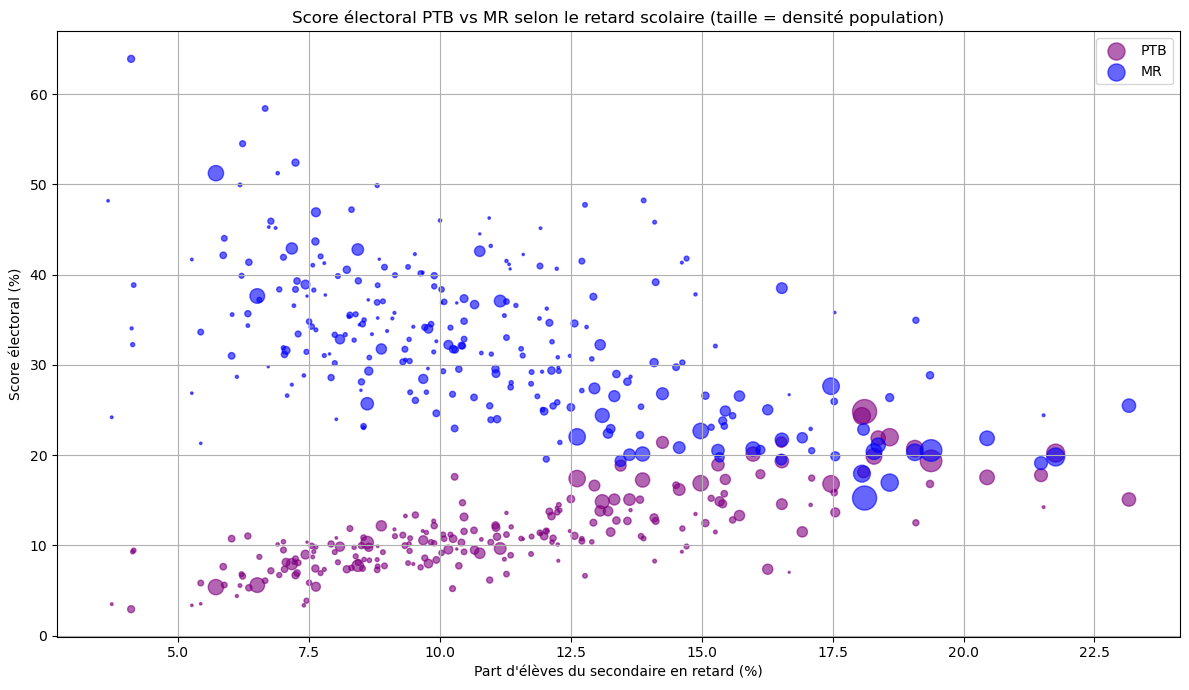

In [182]:
plt.figure(figsize=(12, 7))

# Normaliser la densité pour avoir des tailles de points raisonnables
taille_points = THE_df['Densité population'] / THE_df['Densité population'].max() * 300

# Tracer les points pour le PTB
plt.scatter(
    THE_df["Part d'élève du secondaire en retard"],
    THE_df["PW24 PTB"],
    s=taille_points,
    color='purple',
    alpha=0.6,
    label='PTB'
)

# Tracer les points pour le MR
plt.scatter(
    THE_df["Part d'élève du secondaire en retard"],
    THE_df["PW24 MR"],
    s=taille_points,
    color='blue',
    alpha=0.6,
    label='MR'
)

plt.xlabel("Part d'élèves du secondaire en retard (%)")
plt.ylabel("Score électoral (%)")
plt.title("Score électoral PTB vs MR selon le retard scolaire (taille = densité population)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()